In [5]:
import tensorflow as tf
import util
import glob
import os
import pandas as pd
import numpy as np

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [25]:
class TrainingLog(object):
    
        
    def __init__(self, metric_dict):
        self.__dict__.update(metric_dict)
    
    @classmethod
    def from_csv(cls, dirc, pattern, name_combine=None):
        import glob
        import os
        import pandas as pd
        
        metric_dict = dict()
        if dirc.find('.csv') == -1:
            for file_dirc in glob.glob(dirc + '/*.csv'):
                file_info = util.extract_metadata(target=os.path.basename(file_dirc), pattern=pattern)
                if file_info['type'] == '-':
                    file_info['type'] = 'train'
                elif file_info['type'] == '_eval-':
                    file_info['type'] = 'eval'
                if file_info['tag'][-2:] == '_1':
                    file_info['tag'] = file_info['tag'][:-2]
                if name_combine is not None:
                    print(file_info)
                    metric_dict['_'.join([file_info[name] for name in name_combine])] = pd.read_csv(file_dirc)
                else:
                    metric_dict[file_info['type'] + '_' + file_info['tag']] = pd.read_csv(dirc)
        else:
            file_info = util.extract_metadata(target=os.path.basename(dirc), pattern=pattern)
            if file_info['type'] == '.':
                file_info['type'] = 'train'
            if file_info['tag'][-2:] == '_1':
                file_info['tag'] = file_info['tag'][:-2]
            if name_combine is not None:
                metric_dict['_'.join([file_info[name] for name in name_combine])] = pd.read_csv(file_dirc)
            else:
                metric_dict[file_info['type'] + '_' + file_info['tag']] = pd.read_csv(dirc)
        
        return cls(metric_dict)

In [52]:
training_log_bert = TrainingLog.from_csv(dirc='/mnt/storage/projects/cs-273/bert_training_tracking/bert_10_epochs_res/',
                                         pattern = 'run_[{type}-tag-{tag}].csv')
training_log_bioBert = TrainingLog.from_csv(dirc='/mnt/storage/projects/cs-273/bert_training_tracking/bioBert_10_epochs_res/',
                                         pattern = 'run_[{type}-tag-{tag}].csv')

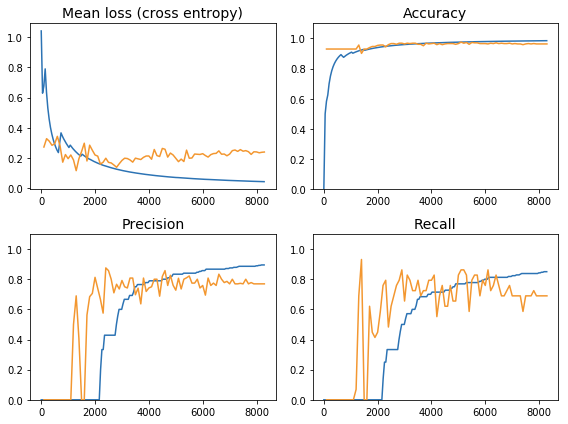

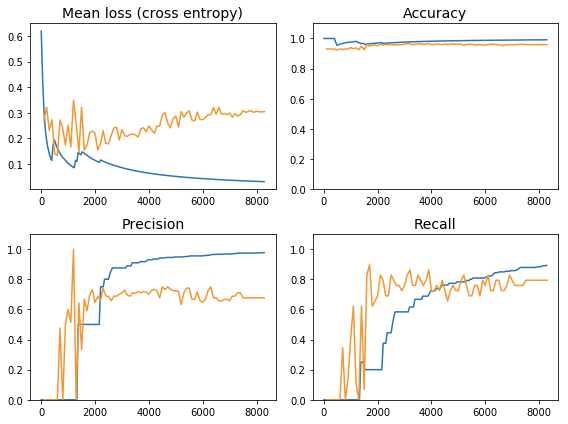

In [74]:
def plot_training_res(training_log):
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(2, 2, figsize=[8, 6])
    
    axes[0, 0].plot(training_log.train_mean_loss['Step'],
                    training_log.train_mean_loss['Value'], color='#2C73B4')
    axes[0, 0].plot(training_log.eval_mean_loss['Step'],
                    training_log.eval_mean_loss['Value'], color='#F39730')
    axes[0, 0].set_title('Mean loss (cross entropy)', fontsize=14)
    
    
    axes[0, 1].plot(training_log.train_accuracy['Step'],
                  training_log.train_accuracy['Value'], color='#2C73B4')
    axes[0, 1].plot(training_log.eval_accuracy['Step'],
                  training_log.eval_accuracy['Value'], '#F39730')
    axes[0, 1].set_title('Accuracy', fontsize=14)
    axes[0, 1].set_ylim([0, 1.1])
    
    
    axes[1, 0].plot(training_log.train_precision['Step'],
                  training_log.train_precision['Value'], color='#2C73B4')
    axes[1, 0].plot(training_log.eval_precision['Step'],
                  training_log.eval_precision['Value'], color='#F39730')
    axes[1, 0].set_title('Precision', fontsize=14)
    axes[1, 0].set_ylim([0, 1.1])
    
    
    axes[1, 1].plot(training_log.train_recall['Step'],
                  training_log.train_recall['Value'], color='#2C73B4')
    axes[1, 1].plot(training_log.eval_recall['Step'],
                  training_log.eval_recall['Value'], color='#F39730')
    axes[1, 1].set_title('Recall', fontsize=14)
    axes[1, 1].set_ylim([0, 1.1])
    plt.tight_layout()
    plt.show()
    
plot_training_res(training_log_bert)
plot_training_res(training_log_bioBert)


In [62]:
def pred_stats(predict, labels):
    res = {}
    res['TP'] = np.sum(np.logical_and(predict, labels))
    res['TN'] = np.sum(np.logical_and(1 - predict, 1 - labels))
    res['FP'] = np.sum(predict) - res['TP']
    res['FN'] = np.sum(1 - predict) - res['TN']
    res['Accuracy'] = (res['TP'] + res['TN'])/(res['TP'] + res['TN'] + res['FP'] + res['FN'])
    res['Precision'] = res['TP']/(res['TP'] + res['FP'])
    res['Recall'] = res['TP']/(res['TP'] + res['FN'])
    res['F1'] = 2 * (res['Recall'] * res['Precision'])/(res['Recall'] + res['Precision'])
    return res

print(util.color.BOLD + util.color.BLUE + \
'Original Bert Model, 10 epoch' + util.color.END)


predict = pd.read_csv('/mnt/storage/projects/cs-273/bert_training_tracking/Bert_10_epochs/test_results.tsv', sep='\t', header=None)
predict_res = np.array(predict[1] > predict[0], dtype=int)
labels = np.array([data.label for data in dataset])
pprint(pred_stats(predict_res, labels))

Original Bert Model, 10 epoch


NameError: name 'test' is not defined

In [26]:
cv_log = TrainingLog.from_csv(
    dirc='/mnt/storage/projects/cs-273/bert_cv/tf_cv_res/',
    pattern='run_[{model}_6_epoch_set_{set_num}{type}tag-{tag}].csv',
    name_combine=['model', 'type', 'set_num', 'tag']
)

{'name': 'BioBert_6_epoch_set_3-tag-accuracy_1', 'model': 'BioBert', 'set_num': '3', 'type': 'train', 'tag': 'accuracy'}
{'name': 'BioBert_6_epoch_set_2_eval-tag-mean_loss', 'model': 'BioBert', 'set_num': '2', 'type': 'eval', 'tag': 'mean_loss'}
{'name': 'BioBert_6_epoch_set_4-tag-accuracy_1', 'model': 'BioBert', 'set_num': '4', 'type': 'train', 'tag': 'accuracy'}
{'name': 'Bert_6_epoch_set_3_eval-tag-accuracy', 'model': 'Bert', 'set_num': '3', 'type': 'eval', 'tag': 'accuracy'}
{'name': 'Bert_6_epoch_set_1-tag-roc_auc_max', 'model': 'Bert', 'set_num': '1', 'type': 'train', 'tag': 'roc_auc_max'}
{'name': 'Bert_6_epoch_set_5-tag-recall_1', 'model': 'Bert', 'set_num': '5', 'type': 'train', 'tag': 'recall'}
{'name': 'Bert_6_epoch_set_5_eval-tag-false_negatives', 'model': 'Bert', 'set_num': '5', 'type': 'eval', 'tag': 'false_negatives'}
{'name': 'Bert_6_epoch_set_3-tag-precision_1', 'model': 'Bert', 'set_num': '3', 'type': 'train', 'tag': 'precision'}
{'name': 'Bert_6_epoch_set_5_eval-tag-

limit_output extension: Maximum message size of 10000 exceeded with 20268 characters

In [28]:
import matplotlib.pyplt as plt

cv_log.Bert_eval_1_accuracy

ModuleNotFoundError: No module named 'matplotlib.pyplt'